## 作图工具Seaborn

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text

In [2]:
# 获取数据库连接
def getEngine(login_info):
    engine = create_engine(
        'postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}'
        .format(user=login_info['user'],
                password=login_info['pw'],
                host=login_info['host'],
                port=login_info['port'],
                db=login_info['db']), echo=False)
    return engine

In [3]:
# 从数据库加载产品主数据(只有男装数据)
def load_product(engine):
    sql = '''select product_id,year_id,substring(quarter_id from 1 for 1) as quarter_id,big_class,
            tiny_class,tag_price from dim_product'''
    df_product = pd.read_sql(sql, engine)
    return df_product

In [4]:
# 定义数据库连接
login_info = {'host': '192.168.200.201',
              'port': '5432',
              'user': 'XXX',
              'pw': 'XXX',
              'db': 'XXX'}
# 获取目标库存
db_egine = getEngine(login_info)
df_product = load_product(db_egine)

In [5]:
# 每年新品数量
df_product_year = df_product.groupby(['year_id']).apply(lambda x : len(x)).reset_index()
df_product_year = df_product_year.rename(columns={0:'count'})
# 每年每个季度的新品数量
df_product_year_quarter = df_product.groupby(['year_id', 'quarter_id']).apply(lambda x : len(x)).reset_index()
df_product_year_quarter = df_product_year_quarter.rename(columns={0:'count'})
# 每年每个季度每一类别的新品数量
df_product_year_quarter_class = df_product.groupby(['year_id', 'quarter_id', 'tiny_class']).apply(lambda x : len(x)).reset_index()
df_product_year_quarter_class = df_product_year_quarter_class.rename(columns={0:'count'})

In [7]:
# IPython环境提供的魔法函数，支持内嵌画图
# %matplotlib inline
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import seaborn as sns
# 解决中文乱码
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})

#### 每年新品数量

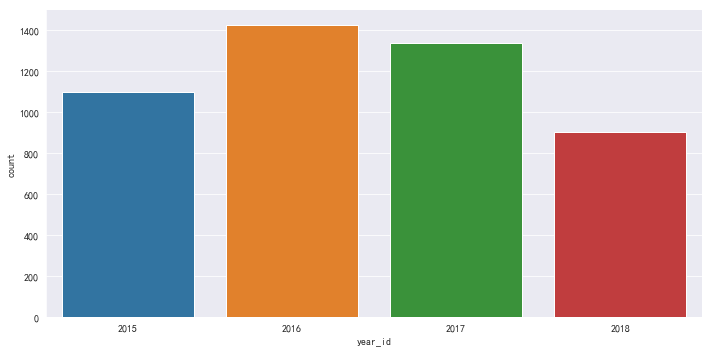

In [12]:
sns.catplot(x='year_id', y='count', data=df_product_year, kind="bar", aspect=2)

#### 每年每个季度新品数量

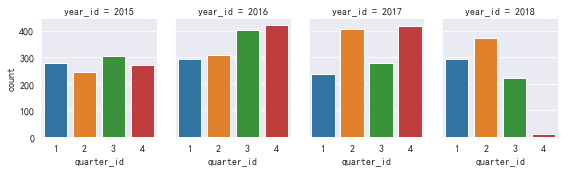

In [15]:
sns.catplot(x='quarter_id', y='count', col="year_id", col_wrap=4, data=df_product_year_quarter, kind="bar", height=2.5, aspect=.8 )

## 每年各个季度每个品类新品数量

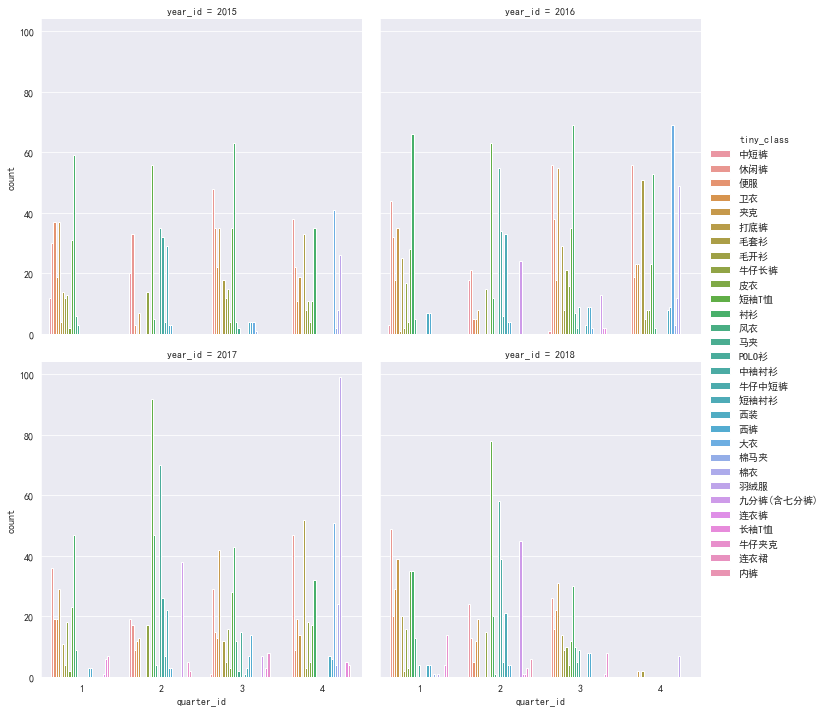

In [16]:
sns.catplot(y='count', x='quarter_id', hue='tiny_class', col="year_id", col_wrap=2, data=df_product_year_quarter_class, kind="bar", aspect=1, margin_titles=True)

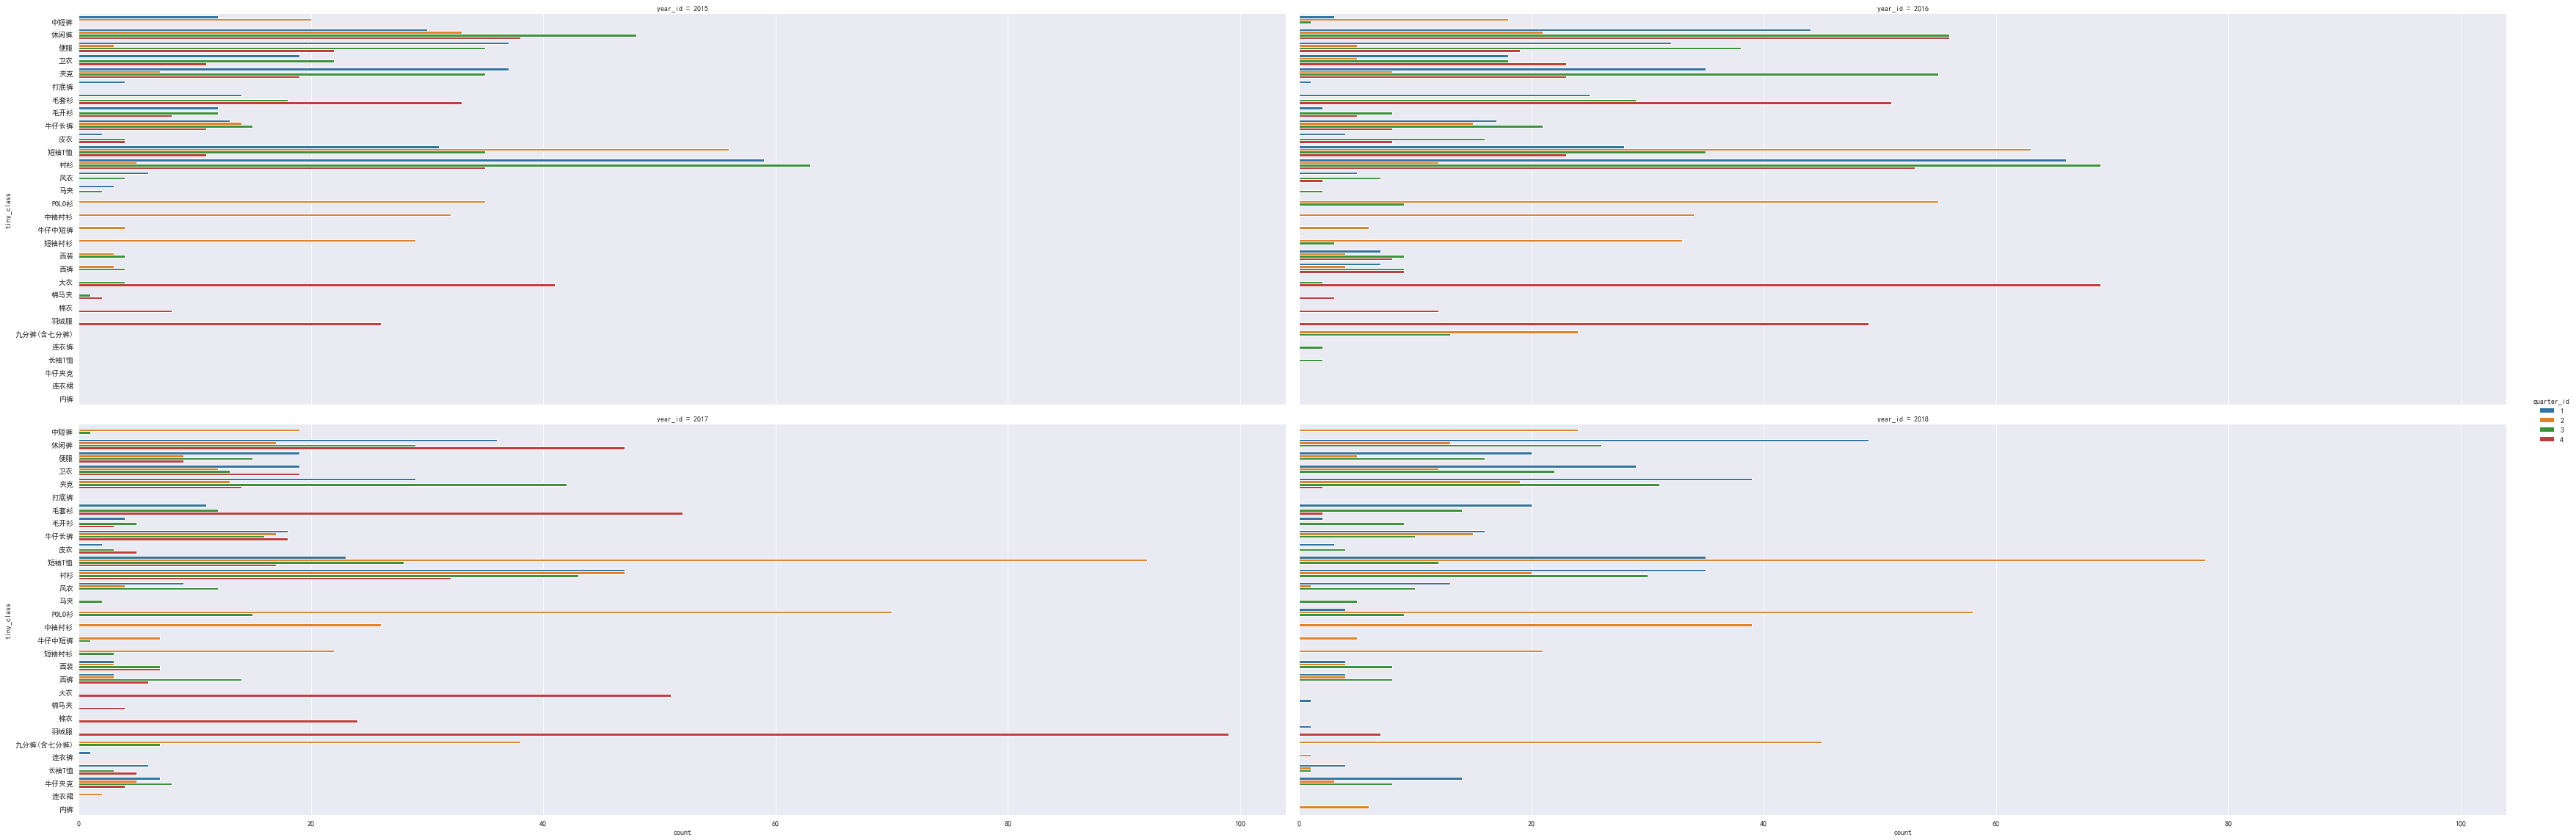

In [77]:
sns.catplot(y='tiny_class', x='count', hue='quarter_id', col="year_id", col_wrap=2, data=df_product_year_quarter_class, kind="bar", height=8, aspect=3, margin_titles=True)

#### 2015年各个季度新品数量

c:\users\frank\pycharmprojects\linezone\venv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


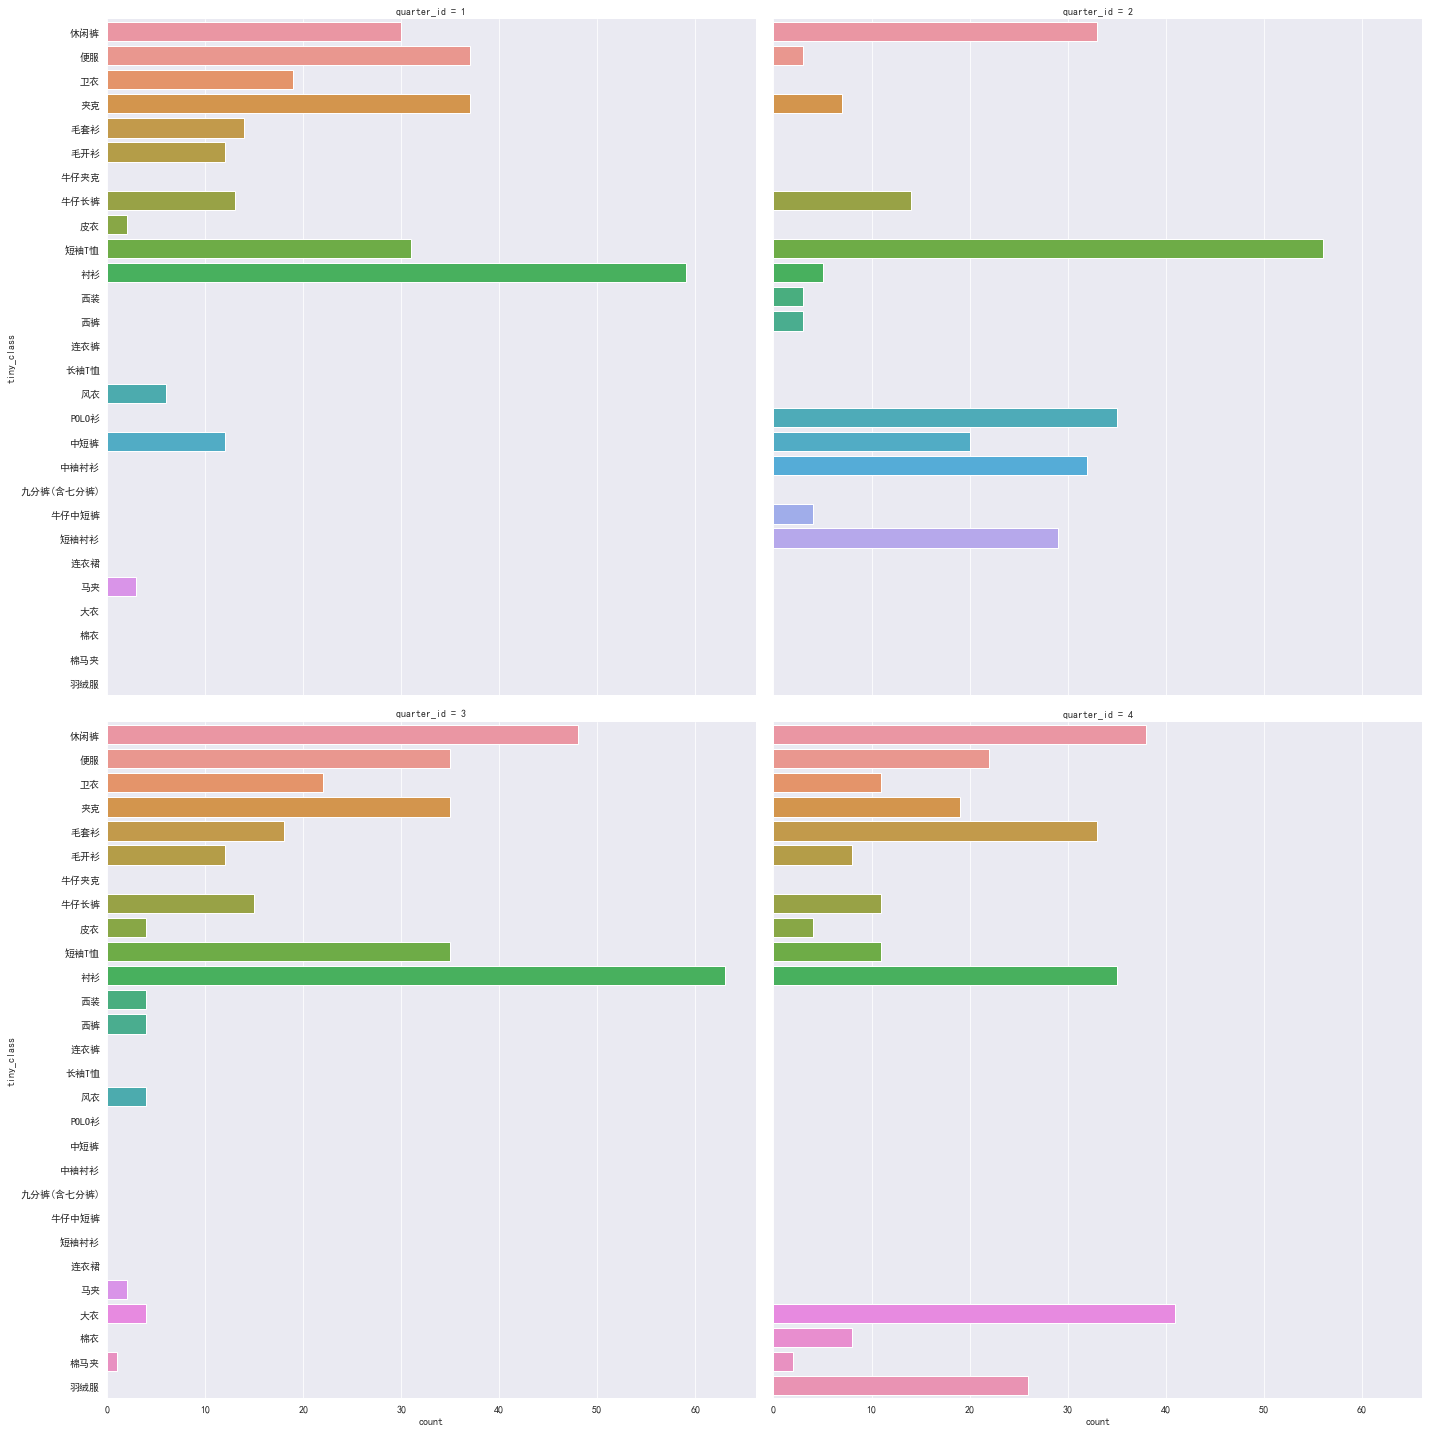

In [20]:
order = ['休闲裤','便服','卫衣','夹克','毛套衫','毛开衫','牛仔夹克','牛仔长裤','皮衣','短袖T恤','衬衫','西装','西裤','连衣裤','长袖T恤','风衣','POLO衫','中短裤','中袖衬衫','九分裤(含七分裤)',
         '牛仔中短裤','短袖衬衫','连衣裙','马夹','大衣','棉衣','棉马夹','羽绒服']
# 观察每年每个季度每个类别商品的数量
df_product_quarter_class_2015 = df_product_year_quarter_class[df_product_year_quarter_class['year_id'] == 2015]
df_product_quarter_class_2015.drop(['year_id'], axis = 1, inplace=True)
sns.catplot(x='count', y="tiny_class", col='quarter_id', kind='bar', col_wrap=2, order=order, height=10, data=df_product_quarter_class_2015)

#### 2016年各个季度新品数量

c:\users\frank\pycharmprojects\linezone\venv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


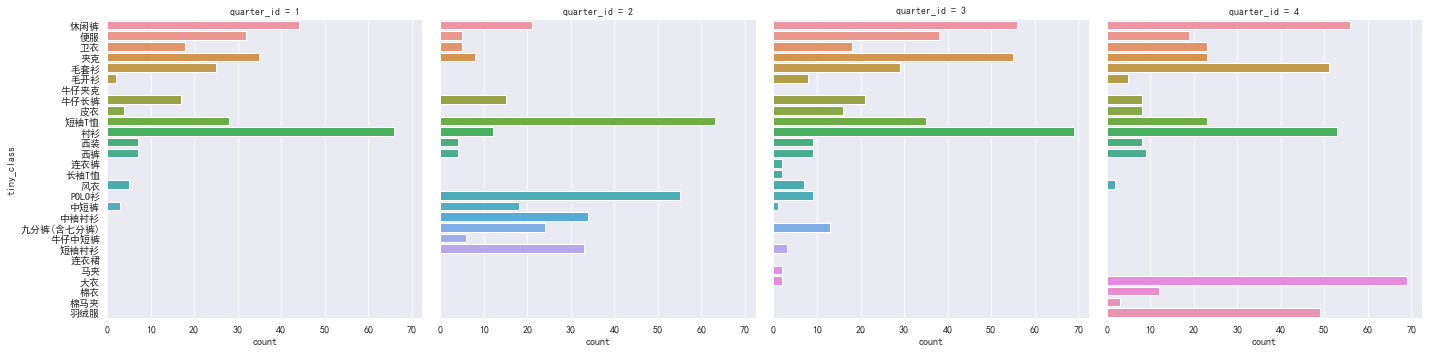

In [21]:
# 观察每年每个季度每个类别商品的数量
df_product_quarter_class_2016 = df_product_year_quarter_class[df_product_year_quarter_class['year_id'] == 2016]
df_product_quarter_class_2016.drop(['year_id'], axis = 1, inplace=True)
sns.catplot(x='count', y="tiny_class", col='quarter_id', kind='bar', col_wrap=4, order=order, data=df_product_quarter_class_2016)

#### 2017年各个季度新品数量

c:\users\frank\pycharmprojects\linezone\venv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


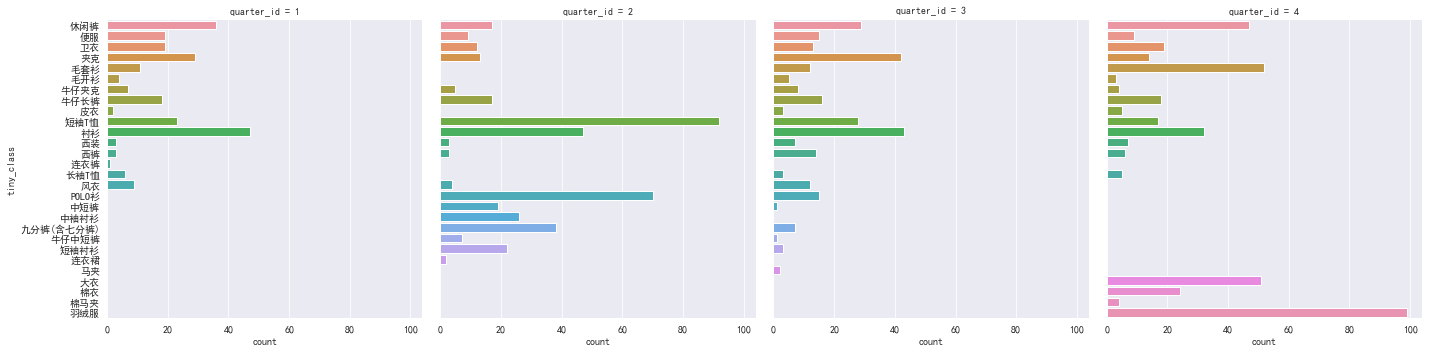

In [22]:
# 观察每年每个季度每个类别商品的数量
df_product_quarter_class_2017 = df_product_year_quarter_class[df_product_year_quarter_class['year_id'] == 2017]
df_product_quarter_class_2017.drop(['year_id'], axis = 1, inplace=True)
sns.catplot(x='count', y="tiny_class", col='quarter_id', kind='bar', col_wrap=4, order=order, data=df_product_quarter_class_2017)

#### 2018年各个季度新品数量

c:\users\frank\pycharmprojects\linezone\venv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


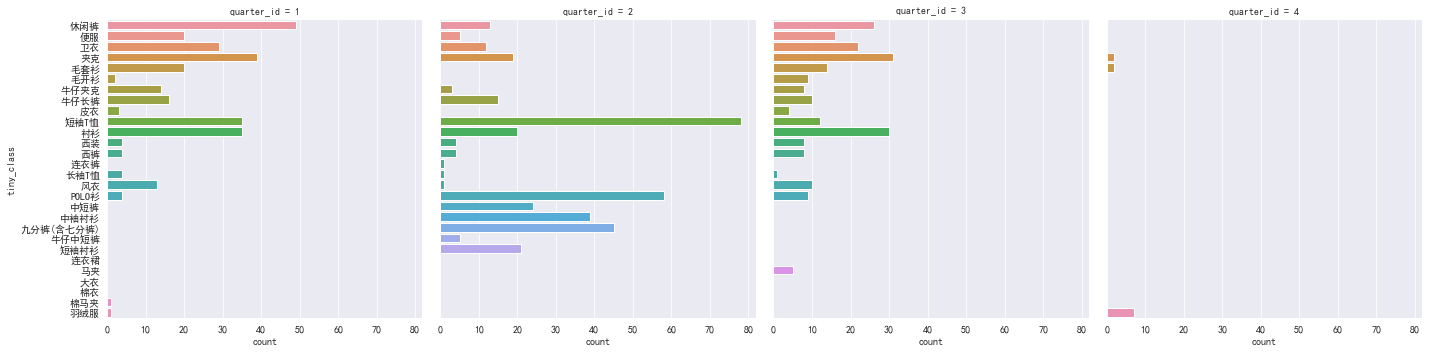

In [23]:
# 观察每年每个季度每个类别商品的数量
df_product_quarter_class_2018 = df_product_year_quarter_class[df_product_year_quarter_class['year_id'] == 2018]
df_product_quarter_class_2018.drop(['year_id'], axis = 1, inplace=True)
sns.catplot(x='count', y="tiny_class", col='quarter_id', kind='bar', col_wrap=4, order=order, data=df_product_quarter_class_2018)